# **Processing the Data**

In [436]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_csv("https://www.dropbox.com/s/ng1zijfpsayzseu/pokedex_%28Update_04.21%29_3.csv?dl=1",index_col=0,encoding= 'unicode_escape')

**Drop features that are clearly not needed.**

In [437]:
df = df.drop(labels = ['pokedex_number','name','german_name','japanese_name','generation','species','type_number','abilities_number',
                       'ability_1','ability_2','ability_hidden','base_friendship','percentage_male','egg_type_number','egg_type_2',
                       'against_normal','against_fire','against_water','against_electric','against_grass','against_ice','against_fight',
                       'against_poison','against_ground','against_flying','against_psychic','against_bug','against_rock','against_ghost',
                       'against_dragon','against_dark','against_steel','against_fairy'], axis = 1)
df = df.drop(1033) # remove eternamax because it is a huge outlier

**Preview the distribution of pokemon per type.**

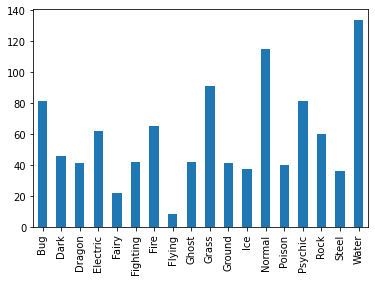

In [438]:
df['type_1'].value_counts().sort_index().plot.bar()

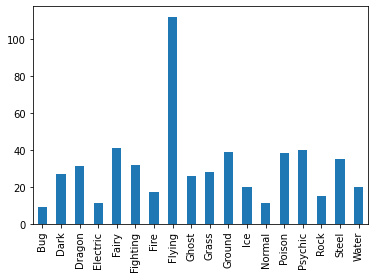

In [439]:
df['type_2'].value_counts().sort_index().plot.bar()

In [440]:
df.describe()

,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,egg_cycles
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,1.279598,71.216571,438.696360,69.890805,80.443487,74.502874,72.981801,72.128352,68.749042,92.919540,155.250000,31.393678
std,1.385909,132.259911,120.188908,26.061943,32.430642,30.799182,32.721971,27.568146,30.165066,75.916006,80.077143,30.389722
min,0.100000,0.100000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,3.000000,36.000000,5.000000
25%,0.600000,9.000000,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,45.000000,67.000000,20.000000
50%,1.000000,29.500000,458.000000,68.000000,77.000000,70.000000,65.000000,70.000000,65.000000,60.000000,161.000000,20.000000
75%,1.600000,70.500000,515.000000,82.000000,100.000000,90.000000,95.000000,90.000000,90.000000,127.000000,201.500000,25.000000
max,20.000000,999.900000,780.000000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000,255.000000,608.000000,120.000000


In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1044
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status           1044 non-null   object 
 1   type_1           1044 non-null   object 
 2   type_2           552 non-null    object 
 3   height_m         1044 non-null   float64
 4   weight_kg        1044 non-null   float64
 5   total_points     1044 non-null   int64  
 6   hp               1044 non-null   int64  
 7   attack           1044 non-null   int64  
 8   defense          1044 non-null   int64  
 9   sp_attack        1044 non-null   int64  
 10  sp_defense       1044 non-null   int64  
 11  speed            1044 non-null   int64  
 12  catch_rate       1044 non-null   int64  
 13  base_experience  1044 non-null   int64  
 14  growth_rate      1044 non-null   object 
 15  egg_type_1       1044 non-null   object 
 16  egg_cycles       1044 non-null   int64  
dtypes: float64(2),

# **Make 3 variations of the dataset: df1, df2, df3**

1.One uses only type_1 and drops type_2<br>2.Second removes all pokemon with a second type<br>3.Third dupes pokemon with two types into two datapoints with the different types (what we did originally) 

**Dataset #1: of only type_1**

In [442]:
df1 = df.drop(labels=['type_2'],axis=1)
df1.info() # 1044 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1044
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status           1044 non-null   object 
 1   type_1           1044 non-null   object 
 2   height_m         1044 non-null   float64
 3   weight_kg        1044 non-null   float64
 4   total_points     1044 non-null   int64  
 5   hp               1044 non-null   int64  
 6   attack           1044 non-null   int64  
 7   defense          1044 non-null   int64  
 8   sp_attack        1044 non-null   int64  
 9   sp_defense       1044 non-null   int64  
 10  speed            1044 non-null   int64  
 11  catch_rate       1044 non-null   int64  
 12  base_experience  1044 non-null   int64  
 13  growth_rate      1044 non-null   object 
 14  egg_type_1       1044 non-null   object 
 15  egg_cycles       1044 non-null   int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 138.7+ KB


**Dataset #2: remove pokemons with second type**

In [443]:
df2_mask = df['type_2'].isnull()
df2 = df[df2_mask].drop(labels=['type_2'],axis=1) # also remove type_2 column
df2.info() # 492 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 4 to 1041
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status           492 non-null    object 
 1   type_1           492 non-null    object 
 2   height_m         492 non-null    float64
 3   weight_kg        492 non-null    float64
 4   total_points     492 non-null    int64  
 5   hp               492 non-null    int64  
 6   attack           492 non-null    int64  
 7   defense          492 non-null    int64  
 8   sp_attack        492 non-null    int64  
 9   sp_defense       492 non-null    int64  
 10  speed            492 non-null    int64  
 11  catch_rate       492 non-null    int64  
 12  base_experience  492 non-null    int64  
 13  growth_rate      492 non-null    object 
 14  egg_type_1       492 non-null    object 
 15  egg_cycles       492 non-null    int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 65.3+ KB


**Dataset #3: dupe pokemons with second type**

In [444]:
without_type2 = df.type_2.isna()
df_withtype2 = df[~without_type2]
df_withtype2 = df_withtype2.drop(labels=['type_1'], axis = 1)
df_withtype2 = df_withtype2.rename({'type_2': 'type_1'}, axis=1)
df3 = pd.concat([df, df_withtype2], ignore_index=True)
df3 = df3.drop(labels=['type_2'], axis = 1)
df3.info() # 1596 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status           1596 non-null   object 
 1   type_1           1596 non-null   object 
 2   height_m         1596 non-null   float64
 3   weight_kg        1596 non-null   float64
 4   total_points     1596 non-null   int64  
 5   hp               1596 non-null   int64  
 6   attack           1596 non-null   int64  
 7   defense          1596 non-null   int64  
 8   sp_attack        1596 non-null   int64  
 9   sp_defense       1596 non-null   int64  
 10  speed            1596 non-null   int64  
 11  catch_rate       1596 non-null   int64  
 12  base_experience  1596 non-null   int64  
 13  growth_rate      1596 non-null   object 
 14  egg_type_1       1596 non-null   object 
 15  egg_cycles       1596 non-null   int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 199.6+ KB


**Preview type_1 distribution of pokemon.**

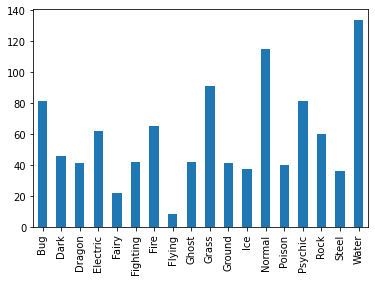

In [445]:
df1['type_1'].value_counts().sort_index().plot.bar()

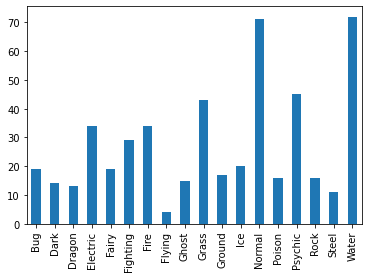

In [446]:
df2['type_1'].value_counts().sort_index().plot.bar()

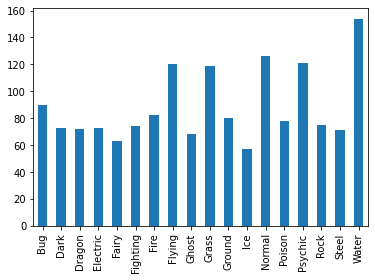

In [447]:
df3['type_1'].value_counts().sort_index().plot.bar()

Drop types from dataset

In [448]:
dropmask = (df1['type_1'] == 'Flying')
df1  = df1[~dropmask]
dropmask = (df1['type_1'] == 'Fairy')
df1  = df1[~dropmask]
dropmask = (df1['type_1'] == 'Dragon')
df1  = df1[~dropmask]
dropmask = (df1['type_1'] == 'Steel')
df1  = df1[~dropmask]
dropmask = (df1['type_1'] == 'Ice')
df1  = df1[~dropmask]
dropmask = (df1['type_1'] == 'Poison')
df1  = df1[~dropmask]
dropmask = (df1['type_1'] == 'Ground')
df1  = df1[~dropmask]
dropmask = (df1['type_1'] == 'Ghost')
df1  = df1[~dropmask]

# **Make 2 versions of each dataset: A (numerical) and B (catergorical)**

There should be 6 datasets total:<br>
df1a, df1b:  dataset #1, 1a is numerical and 1b is categorical<br>
df2a, df2b:  dataset #2, 2a is numerical and 2b is categorical<br>
df3a, df3b:  dataset #3, 3a is numerical and 3b is categorical<br>

**Create the numerical versions of the 3 datasets by converting categorical features to binary via one hot encoding.**

In [449]:
Y1 = df1.loc[: , ['type_1']] # put class labels into seperate df
Y1

,type_1
0,Grass
1,Grass
2,Grass
3,Grass
4,Fire
...,...
1037,Dark
1038,Electric
1042,Psychic
1043,Psychic


In [450]:
# converting df1 into df1a
df_r_Binary1 = df1.loc[: , ['status']].astype('category')
df_r_Binary1 = pd.get_dummies(df_r_Binary1)

df_r_Binary2 = df1.loc[: , ['egg_type_1']].astype('category')
df_r_Binary2 = pd.get_dummies(df_r_Binary2)

df_r_Binary3 = df1.loc[: , ['growth_rate']].astype('category')
df_r_Binary3 = pd.get_dummies(df_r_Binary3)

df1a = df1.drop(['status','egg_type_1','growth_rate'], axis=1).join(df_r_Binary1).join(df_r_Binary2).join(df_r_Binary3)
df1a # number of columns increased from 16 --> 38 because 3 categorical columns have been split into binary columns

,type_1,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,egg_cycles,status_Legendary,status_Mythical,status_Normal,status_Sub Legendary,egg_type_1_Amorphous,egg_type_1_Bug,egg_type_1_Ditto,egg_type_1_Dragon,egg_type_1_Fairy,egg_type_1_Field,egg_type_1_Flying,egg_type_1_Grass,egg_type_1_Human-Like,egg_type_1_Mineral,egg_type_1_Monster,egg_type_1_Undiscovered,egg_type_1_Water 1,egg_type_1_Water 2,egg_type_1_Water 3,growth_rate_Erratic,growth_rate_Fast,growth_rate_Fluctuating,growth_rate_Medium Fast,growth_rate_Medium Slow,growth_rate_Slow
0,Grass,0.7,6.9,318,45,49,49,65,65,45,45,64,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Grass,1.0,13.0,405,60,62,63,80,80,60,45,142,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Grass,2.0,100.0,525,80,82,83,100,100,80,45,236,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Grass,2.4,155.5,625,80,100,123,122,120,80,45,281,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Fire,0.6,8.5,309,39,52,43,60,50,65,45,62,20,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,Dark,1.8,70.0,600,105,120,105,70,95,105,3,300,120,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1038,Electric,1.2,145.0,580,80,100,50,100,50,200,3,290,120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1042,Psychic,1.1,7.7,500,100,80,80,80,80,80,3,250,120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1043,Psychic,2.4,809.1,680,100,165,150,85,130,50,3,340,120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [451]:
df1a = df1a.drop(['type_1'], axis=1)

In [452]:
Y2 = df2.loc[: , ['type_1']]
Y2

,type_1
4,Fire
5,Fire
9,Water
10,Water
11,Water
...,...
1034,Fighting
1038,Electric
1039,Dragon
1040,Ice


In [453]:
# converting df2 into df2a
df_r_Binary1 = df2.loc[: , ['status']].astype('category')
df_r_Binary1 = pd.get_dummies(df_r_Binary1)

df_r_Binary2 = df2.loc[: , ['egg_type_1']].astype('category')
df_r_Binary2 = pd.get_dummies(df_r_Binary2)

df_r_Binary3 = df2.loc[: , ['growth_rate']].astype('category')
df_r_Binary3 = pd.get_dummies(df_r_Binary3)

df2a = df2.drop(['status','egg_type_1','growth_rate'], axis=1).join(df_r_Binary1).join(df_r_Binary2).join(df_r_Binary3)
df2a # number of columns increased from 16 --> 38 because 3 categorical columns have been split into binary columns

,type_1,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,egg_cycles,status_Legendary,status_Mythical,status_Normal,status_Sub Legendary,egg_type_1_Amorphous,egg_type_1_Bug,egg_type_1_Ditto,egg_type_1_Dragon,egg_type_1_Fairy,egg_type_1_Field,egg_type_1_Flying,egg_type_1_Grass,egg_type_1_Human-Like,egg_type_1_Mineral,egg_type_1_Monster,egg_type_1_Undiscovered,egg_type_1_Water 1,egg_type_1_Water 2,egg_type_1_Water 3,growth_rate_Erratic,growth_rate_Fast,growth_rate_Fluctuating,growth_rate_Medium Fast,growth_rate_Medium Slow,growth_rate_Slow
4,Fire,0.6,8.5,309,39,52,43,60,50,65,45,62,20,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,Fire,1.1,19.0,405,58,64,58,80,65,80,45,142,20,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,Water,0.5,9.0,314,44,48,65,50,64,43,45,63,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
10,Water,1.0,22.5,405,59,63,80,65,80,58,45,142,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
11,Water,1.6,85.5,530,79,83,100,85,105,78,45,239,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,Fighting,0.6,12.0,385,60,90,60,53,50,72,3,77,120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1038,Electric,1.2,145.0,580,80,100,50,100,50,200,3,290,120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1039,Dragon,2.1,200.0,580,200,100,50,100,50,80,3,290,120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1040,Ice,2.2,800.0,580,100,145,130,65,110,30,3,290,120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [454]:
df2a = df2a.drop(['type_1'], axis=1)

In [455]:
Y3 = df3.loc[: , ['type_1']]
Y3

,type_1
0,Grass
1,Grass
2,Grass
3,Grass
4,Fire
...,...
1591,Water
1592,Grass
1593,Grass
1594,Ice


In [456]:
# converting df3 into df3a
df_r_Binary1 = df3.loc[: , ['status']].astype('category')
df_r_Binary1 = pd.get_dummies(df_r_Binary1)

df_r_Binary2 = df3.loc[: , ['egg_type_1']].astype('category')
df_r_Binary2 = pd.get_dummies(df_r_Binary2)

df_r_Binary3 = df3.loc[: , ['growth_rate']].astype('category')
df_r_Binary3 = pd.get_dummies(df_r_Binary3)

df3a = df3.drop(['status','egg_type_1','growth_rate'], axis=1).join(df_r_Binary1).join(df_r_Binary2).join(df_r_Binary3)
df3a # number of columns increased from 16 --> 38 because 3 categorical columns have been split into binary columns

,type_1,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,egg_cycles,status_Legendary,status_Mythical,status_Normal,status_Sub Legendary,egg_type_1_Amorphous,egg_type_1_Bug,egg_type_1_Ditto,egg_type_1_Dragon,egg_type_1_Fairy,egg_type_1_Field,egg_type_1_Flying,egg_type_1_Grass,egg_type_1_Human-Like,egg_type_1_Mineral,egg_type_1_Monster,egg_type_1_Undiscovered,egg_type_1_Water 1,egg_type_1_Water 2,egg_type_1_Water 3,growth_rate_Erratic,growth_rate_Fast,growth_rate_Fluctuating,growth_rate_Medium Fast,growth_rate_Medium Slow,growth_rate_Slow
0,Grass,0.7,6.9,318,45,49,49,65,65,45,45,64,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Grass,1.0,13.0,405,60,62,63,80,80,60,45,142,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Grass,2.0,100.0,525,80,82,83,100,100,80,45,236,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Grass,2.4,155.5,625,80,100,123,122,120,80,45,281,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Fire,0.6,8.5,309,39,52,43,60,50,65,45,62,20,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,Water,1.9,105.0,550,100,130,100,63,60,97,3,275,120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1592,Grass,1.8,70.0,600,105,120,105,70,95,105,3,300,120,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1593,Grass,1.1,7.7,500,100,80,80,80,80,80,3,250,120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1594,Ice,2.4,809.1,680,100,165,150,85,130,50,3,340,120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [457]:
df3a = df3a.drop(['type_1'], axis=1)

**Create the categorical versions of the 3 datasets by binning numerical values into categorical bins.**

# **DF1B**

**Height:**

In [458]:
def check_outliers(x):
  q25 = x.quantile(.25)
  q75 = x.quantile(.75)
  IQR = q75-q25
  l = q25 - IQR*2
  u = q75 + IQR*2
  return l, u

In [459]:
lower, upper = check_outliers(df1['height_m'])
print(f'lower = {lower}, upper={upper}')

lower = -1.5, upper=3.5


In [460]:
mask_lower = df1['height_m']< lower

In [461]:
mask_upper = df1['height_m']>upper

In [462]:
#let's replace these outliers with upper boundary.
df1['new_height_m']= df1['height_m']
for i in df1[mask_upper].index:
  df1.loc[i,'new_height_m']=upper

In [463]:
df1['height_m_bin_ef'] = pd.qcut(df1['new_height_m'],4)
df1['height_m_bin_ef'].describe()

count            777
unique             4
top       (0.5, 1.0]
freq             222
Name: height_m_bin_ef, dtype: object

**Weight**

In [464]:
lower, upper = check_outliers(df1['weight_kg'])
print(f'lower = {lower}, upper={upper}')

lower = -95.49999999999999, upper=165.0


In [465]:
mask_lower = df1['weight_kg']< lower

In [466]:
mask_upper = df1['weight_kg']>upper

In [467]:
#let's replace these outliers with upper boundary.
df1['new_weight_kg']= df1['weight_kg']
for i in df1[mask_upper].index:
  df1.loc[i,'new_weight_kg']=upper

In [468]:
#EF binning should be best for this one as well bc of the skewed data
df1['weight_kg_bin_ef'] = pd.qcut(df1['new_weight_kg'],4)

**HP**

In [469]:
lower, upper = check_outliers(df1['hp'])
print(f'lower = {lower}, upper={upper}')

lower = -10.0, upper=140.0


In [470]:
mask_lower = df1['hp']< lower

In [471]:
mask_upper = df1['hp']>upper

In [472]:
#let's replace these outliers with upper boundary.
df1['new_hp']= df1['hp']
for i in df1[mask_upper].index:
  df1.loc[i,'new_hp']=upper

In [473]:
#EF binning should be best for this one as well bc of the skewed data
df1['hp_bin_ef'] = pd.qcut(df1['new_hp'],6)

**Attack:**

In [474]:
lower, upper = check_outliers(df1['attack'])
print(f'lower = {lower}, upper={upper}')

lower = -35.0, upper=190.0


In [475]:
mask_lower = df1['attack']< lower

In [476]:
mask_upper = df1['attack']>upper 

In [477]:
#EF binning should be best for this one as well bc of the skewed data
df1['attack_bin_ef'] = pd.qcut(df1['attack'],6)

**Defense**

In [478]:
lower, upper = check_outliers(df1['defense'])
print(f'lower = {lower}, upper={upper}')

lower = -30.0, upper=170.0


In [479]:
mask_lower = df1['defense']< lower

In [480]:
mask_upper = df1['defense']>upper

In [481]:
#let's replace these outliers with upper boundary.
df1['new_defense']= df1['defense']
for i in df1[mask_upper].index:
  df1.loc[i,'new_defense']=upper

In [482]:
#EF binning should be best for this one as well bc of the skewed data
df1['defense_bin_ef'] = pd.qcut(df1['new_defense'],6)

**sp_attack**

In [483]:
lower, upper = check_outliers(df1['sp_attack'])
print(f'lower = {lower}, upper={upper}')

lower = -40.0, upper=185.0


In [484]:
mask_lower = df1['sp_attack']< lower

In [485]:
mask_upper = df1['sp_attack']>upper

In [486]:
#let's replace these outliers with upper boundary.
df1['new_sp_attack']= df1['sp_attack']
for i in df1[mask_upper].index:
  df1.loc[i,'new_sp_attack']=upper

In [487]:
#EF binning should be best for this one as well bc of the skewed data
df1['sp_attack_bin_ef'] = pd.qcut(df1['new_sp_attack'],6)

**sp_defense**

In [488]:
lower, upper = check_outliers(df1['sp_defense'])
print(f'lower = {lower}, upper={upper}')

lower = -30.0, upper=170.0


In [489]:
mask_lower = df1['sp_defense']< lower

In [490]:
mask_upper = df1['sp_defense']>upper

In [491]:
#let's replace these outliers with upper boundary.
df1['new_sp_defense']= df1['sp_defense']
for i in df1[mask_upper].index:
  df1.loc[i,'new_sp_defense']=upper

In [492]:
#EF binning should be best for this one as well bc of the skewed data
df1['sp_defense_bin_ef'] = pd.qcut(df1['new_sp_defense'],6)

**speed**

In [493]:
lower, upper = check_outliers(df1['speed'])
print(f'lower = {lower}, upper={upper}')

lower = -45.0, upper=180.0


In [494]:
mask_lower = df1['speed']< lower

In [495]:
mask_upper = df1['speed']>upper

In [496]:
#let's replace these outliers with upper boundary.
df1['new_speed']= df1['speed']
for i in df1[mask_upper].index:
  df1.loc[i,'new_speed']=upper

In [497]:
#EF binning should be best for this one as well bc of the skewed data
df1['speed_bin_ef'] = pd.qcut(df1['new_speed'],6)

**total_points**

In [498]:
lower, upper = check_outliers(df1['total_points'])
print(f'lower = {lower}, upper={upper}')

lower = -30.0, upper=870.0


In [499]:
mask_lower = df1['total_points']< lower

In [500]:
mask_upper = df1['total_points']>upper

In [501]:
#EF binning should be best for this one as well bc of the skewed data
df1['total_points_bin_ef'] = pd.qcut(df1['total_points'],6)

**catch_rate**

In [502]:
lower, upper = check_outliers(df1['catch_rate'])
print(f'lower = {lower}, upper={upper}')

lower = -165.0, upper=360.0


In [503]:
mask_lower = df1['catch_rate']< lower

In [504]:
mask_upper = df1['catch_rate']>upper

In [505]:
#EF binning should be best for this one as well bc of the skewed data
df1['catch_rate_bin_ef'] = pd.qcut(df1['catch_rate'],4)

**base_experience**

In [506]:
lower, upper = check_outliers(df1['base_experience'])
print(f'lower = {lower}, upper={upper}')

lower = -174.0, upper=431.0


In [507]:
mask_lower = df1['base_experience']< lower

In [508]:
mask_upper = df1['base_experience']>upper

In [509]:
#let's replace these outliers with upper boundary.
df1['new_base_experience']= df1['base_experience']
for i in df1[mask_upper].index:
  df1.loc[i,'new_base_experience']=upper

In [510]:
#EF binning should be best for this one as well bc of the skewed data
df1['base_experience_bin_ef'] = pd.qcut(df1['new_base_experience'],6)

**egg_cycles**

In [511]:
lower, upper = check_outliers(df1['egg_cycles'])
print(f'lower = {lower}, upper={upper}')

lower = 20.0, upper=20.0


In [512]:
mask_lower = df1['egg_cycles']< lower

In [513]:
mask_upper = df1['egg_cycles']>upper

In [514]:
#let's replace these outliers with upper boundary.
df1['new_egg_cycles']= df1['egg_cycles']
for i in df1[mask_upper].index:
  df1.loc[i,'new_egg_cycles']=upper
for i in df1[mask_lower].index:
  df1.loc[i,'new_egg_cycles']=lower

In [515]:
df1['egg_cycles_bin_ew'] = pd.cut(df1['new_egg_cycles'],3)

**removing unneeded columns**

In [516]:
df1b = df1.drop(labels=['height_m', 'weight_kg', 'total_points', 'hp',
        'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'catch_rate',
       'base_experience', 'egg_cycles', 'new_height_m', 'new_weight_kg', 'new_hp',
       'new_defense', 'new_sp_attack', 'new_sp_defense', 'new_speed',
       'new_base_experience', 'new_egg_cycles'], axis = 1)

In [517]:
df1b

,status,type_1,growth_rate,egg_type_1,height_m_bin_ef,weight_kg_bin_ef,hp_bin_ef,attack_bin_ef,defense_bin_ef,sp_attack_bin_ef,sp_defense_bin_ef,speed_bin_ef,total_points_bin_ef,catch_rate_bin_ef,base_experience_bin_ef,egg_cycles_bin_ew
0,Normal,Grass,Medium Slow,Grass,"(0.5, 1.0]","(0.099, 8.7]","(0.999, 45.0]","(48.0, 62.0]","(45.0, 55.0]","(55.0, 66.0]","(55.667, 70.0]","(40.0, 55.0]","(305.0, 381.333]","(2.999, 45.0]","(62.0, 118.667]","(19.993, 20.007]"
1,Normal,Grass,Medium Slow,Grass,"(0.5, 1.0]","(8.7, 27.3]","(59.0, 65.0]","(48.0, 62.0]","(55.0, 68.0]","(66.0, 85.0]","(70.0, 80.0]","(55.0, 67.0]","(381.333, 454.0]","(2.999, 45.0]","(118.667, 159.0]","(19.993, 20.007]"
2,Normal,Grass,Medium Slow,Grass,"(1.5, 3.5]","(60.8, 165.0]","(75.0, 90.0]","(75.0, 90.0]","(80.0, 100.0]","(85.0, 103.667]","(95.667, 170.0]","(67.0, 83.0]","(490.0, 534.0]","(2.999, 45.0]","(175.0, 238.667]","(19.993, 20.007]"
3,Normal,Grass,Medium Slow,Grass,"(1.5, 3.5]","(60.8, 165.0]","(75.0, 90.0]","(90.0, 110.0]","(100.0, 170.0]","(103.667, 185.0]","(95.667, 170.0]","(67.0, 83.0]","(534.0, 780.0]","(2.999, 45.0]","(238.667, 431.0]","(19.993, 20.007]"
4,Normal,Fire,Medium Slow,Dragon,"(0.5, 1.0]","(0.099, 8.7]","(0.999, 45.0]","(48.0, 62.0]","(4.999, 45.0]","(55.0, 66.0]","(45.0, 55.667]","(55.0, 67.0]","(305.0, 381.333]","(2.999, 45.0]","(35.999, 62.0]","(19.993, 20.007]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,Mythical,Dark,Slow,Undiscovered,"(1.5, 3.5]","(60.8, 165.0]","(90.0, 140.0]","(110.0, 190.0]","(100.0, 170.0]","(66.0, 85.0]","(80.0, 95.667]","(100.0, 180.0]","(534.0, 780.0]","(2.999, 45.0]","(238.667, 431.0]","(19.993, 20.007]"
1038,Sub Legendary,Electric,Slow,Undiscovered,"(1.0, 1.5]","(60.8, 165.0]","(75.0, 90.0]","(90.0, 110.0]","(45.0, 55.0]","(85.0, 103.667]","(45.0, 55.667]","(100.0, 180.0]","(534.0, 780.0]","(2.999, 45.0]","(238.667, 431.0]","(19.993, 20.007]"
1042,Legendary,Psychic,Slow,Undiscovered,"(1.0, 1.5]","(0.099, 8.7]","(90.0, 140.0]","(75.0, 90.0]","(68.0, 80.0]","(66.0, 85.0]","(70.0, 80.0]","(67.0, 83.0]","(490.0, 534.0]","(2.999, 45.0]","(238.667, 431.0]","(19.993, 20.007]"
1043,Legendary,Psychic,Slow,Undiscovered,"(1.5, 3.5]","(60.8, 165.0]","(90.0, 140.0]","(110.0, 190.0]","(100.0, 170.0]","(66.0, 85.0]","(95.667, 170.0]","(40.0, 55.0]","(534.0, 780.0]","(2.999, 45.0]","(238.667, 431.0]","(19.993, 20.007]"


# **DF2B**

**Height:**

In [518]:
lower, upper = check_outliers(df2['height_m'])
print(f'lower = {lower}, upper={upper}')

lower = -1.2999999999999998, upper=3.1999999999999997


In [519]:
mask_lower = df2['height_m']< lower

In [520]:
mask_upper = df2['height_m']>upper

In [521]:
#let's replace these outliers with upper boundary.
df2['new_height_m']= df2['height_m']
for i in df2[mask_upper].index:
  df2.loc[i,'new_height_m']=upper

In [522]:
df2['height_m_bin_ef'] = pd.qcut(df2['new_height_m'],4)

**Weight**

In [523]:
lower, upper = check_outliers(df2['weight_kg'])
print(f'lower = {lower}, upper={upper}')

lower = -82.325, upper=143.425


In [524]:
mask_lower = df2['weight_kg']< lower

In [525]:
mask_upper = df2['weight_kg']>upper

In [526]:
#let's replace these outliers with upper boundary.
df2['new_weight_kg']= df2['weight_kg']
for i in df2[mask_upper].index:
  df2.loc[i,'new_weight_kg']=upper

In [527]:
#EF binning should be best for this one as well bc of the skewed data
df2['weight_kg_bin_ef'] = pd.qcut(df2['new_weight_kg'],4)

**HP**

In [528]:
lower, upper = check_outliers(df2['hp'])
print(f'lower = {lower}, upper={upper}')

lower = -8.0, upper=137.0


In [529]:
mask_lower = df2['hp']< lower

In [530]:
mask_upper = df2['hp']>upper 

In [531]:
#let's replace these outliers with upper boundary.
df2['new_hp']= df2['hp']
for i in df2[mask_upper].index:
  df2.loc[i,'new_hp']=upper

In [532]:
#EF binning should be best for this one as well bc of the skewed data
df2['hp_bin_ef'] = pd.qcut(df2['new_hp'],6)

**Attack:**

In [533]:
lower, upper = check_outliers(df2['attack'])
print(f'lower = {lower}, upper={upper}')

lower = -32.0, upper=180.5


In [534]:
mask_lower = df2['attack']< lower

In [535]:
mask_upper = df2['attack']>upper

In [536]:
#EF binning should be best for this one as well bc of the skewed data
df2['attack_bin_ef'] = pd.qcut(df2['attack'],6)

**Defense**

In [537]:
lower, upper = check_outliers(df2['defense'])
print(f'lower = {lower}, upper={upper}')

lower = -11.0, upper=141.5


In [538]:
mask_lower = df2['defense']< lower

In [539]:
mask_upper = df2['defense']>upper

In [540]:
#let's replace these outliers with upper boundary.
df2['new_defense']= df2['defense']
for i in df2[mask_upper].index:
  df2.loc[i,'new_defense']=upper

In [541]:
#EF binning should be best for this one as well bc of the skewed data
df2['defense_bin_ef'] = pd.qcut(df2['new_defense'],6)

**sp_attack**

In [542]:
lower, upper = check_outliers(df2['sp_attack'])
print(f'lower = {lower}, upper={upper}')

lower = -35.0, upper=165.0


In [543]:
mask_lower = df2['sp_attack']< lower

In [544]:
mask_upper = df2['sp_attack']>upper

In [545]:
#let's replace these outliers with upper boundary.
df2['new_sp_attack']= df2['sp_attack']
for i in df2[mask_upper].index:
  df2.loc[i,'new_sp_attack']=upper

In [546]:
#EF binning should be best for this one as well bc of the skewed data
df2['sp_attack_bin_ef'] = pd.qcut(df2['new_sp_attack'],6)

**sp_defense**

In [547]:
lower, upper = check_outliers(df2['sp_defense'])
print(f'lower = {lower}, upper={upper}')

lower = -20.75, upper=155.5


In [548]:
mask_lower = df2['sp_defense']< lower

In [549]:
mask_upper = df2['sp_defense']>upper

In [550]:
#let's replace these outliers with upper boundary.
df2['new_sp_defense']= df2['sp_defense']
for i in df2[mask_upper].index:
  df2.loc[i,'new_sp_defense']=upper

In [551]:
#EF binning should be best for this one as well bc of the skewed data
df2['sp_defense_bin_ef'] = pd.qcut(df2['new_sp_defense'],6)

**speed**

In [552]:
lower, upper = check_outliers(df2['speed'])
print(f'lower = {lower}, upper={upper}')

lower = -36.75, upper=167.0


In [553]:
mask_lower = df2['speed']< lower

In [554]:
mask_upper = df2['speed']>upper

In [555]:
#let's replace these outliers with upper boundary.
df2['new_speed']= df2['speed']
for i in df2[mask_upper].index:
  df2.loc[i,'new_speed']=upper

In [556]:
#EF binning should be best for this one as well bc of the skewed data
df2['speed_bin_ef'] = pd.qcut(df2['new_speed'],6)

**total_points**

In [557]:
lower, upper = check_outliers(df2['total_points'])
print(f'lower = {lower}, upper={upper}')

lower = -60.0, upper=865.0


In [558]:
mask_lower = df2['total_points']< lower

In [559]:
mask_upper = df2['total_points']>upper

In [560]:
#EF binning should be best for this one as well bc of the skewed data
df2['total_points_bin_ef'] = pd.qcut(df2['total_points'],6)

**catch_rate**

In [561]:
lower, upper = check_outliers(df2['catch_rate'])
print(f'lower = {lower}, upper={upper}')

lower = -245.0, upper=480.0


In [562]:
mask_lower = df2['catch_rate']< lower

In [563]:
mask_upper = df2['catch_rate']>upper

In [564]:
#EF binning should be best for this one as well bc of the skewed data
df2['catch_rate_bin_ef'] = pd.qcut(df2['catch_rate'],4)

**base_experience**

In [565]:
lower, upper = check_outliers(df2['base_experience'])
print(f'lower = {lower}, upper={upper}')

lower = -161.0, upper=399.0


In [566]:
mask_lower = df2['base_experience']< lower

In [567]:
mask_upper = df2['base_experience']>upper

In [568]:
#let's replace these outliers with upper boundary.
df2['new_base_experience']= df2['base_experience']
for i in df2[mask_upper].index:
  df2.loc[i,'new_base_experience']=upper

In [569]:
#EF binning should be best for this one as well bc of the skewed data
df2['base_experience_bin_ef'] = pd.qcut(df2['new_base_experience'],6)

**egg_cycles**

In [570]:
lower, upper = check_outliers(df2['egg_cycles'])
print(f'lower = {lower}, upper={upper}')

lower = 10.0, upper=35.0


In [571]:
mask_lower = df2['egg_cycles']< lower

In [572]:
mask_upper = df2['egg_cycles']>upper

In [573]:
#let's replace these outliers with upper boundary.
df2['new_egg_cycles']= df2['egg_cycles']
for i in df2[mask_upper].index:
  df2.loc[i,'new_egg_cycles']=upper
for i in df2[mask_lower].index:
  df2.loc[i,'new_egg_cycles']=lower

In [574]:
df2['egg_cycles_bin_ew'] = pd.cut(df2['new_egg_cycles'],3)

**removing unneeded columns**

In [575]:
df2 = df2.drop(labels=['new_height_m', 'new_weight_kg', 'new_hp',
       'new_defense', 'new_sp_attack', 'new_sp_defense', 'new_speed',
       'new_base_experience', 'new_egg_cycles'], axis = 1)
df2b = df2.drop(labels=['height_m', 'weight_kg', 'total_points', 'hp',
        'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'catch_rate',
       'base_experience', 'egg_cycles'], axis = 1)

In [576]:
df2b

,status,type_1,growth_rate,egg_type_1,height_m_bin_ef,weight_kg_bin_ef,hp_bin_ef,attack_bin_ef,defense_bin_ef,sp_attack_bin_ef,sp_defense_bin_ef,speed_bin_ef,total_points_bin_ef,catch_rate_bin_ef,base_experience_bin_ef,egg_cycles_bin_ew
4,Normal,Fire,Medium Slow,Dragon,"(0.5, 0.8]","(7.975, 23.4]","(9.999, 45.0]","(46.833, 60.0]","(42.833, 55.0]","(50.0, 62.0]","(41.833, 53.0]","(63.0, 78.0]","(295.0, 330.0]","(2.999, 45.0]","(60.0, 68.667]","(18.333, 26.667]"
5,Normal,Fire,Medium Slow,Dragon,"(0.8, 1.4]","(7.975, 23.4]","(55.0, 65.0]","(60.0, 71.5]","(55.0, 64.0]","(75.0, 95.0]","(63.0, 75.0]","(78.0, 95.0]","(330.0, 420.0]","(2.999, 45.0]","(68.667, 145.0]","(18.333, 26.667]"
9,Normal,Water,Medium Slow,Monster,"(0.099, 0.5]","(7.975, 23.4]","(9.999, 45.0]","(46.833, 60.0]","(64.0, 75.0]","(40.0, 50.0]","(63.0, 75.0]","(35.0, 50.0]","(295.0, 330.0]","(2.999, 45.0]","(60.0, 68.667]","(18.333, 26.667]"
10,Normal,Water,Medium Slow,Monster,"(0.8, 1.4]","(7.975, 23.4]","(55.0, 65.0]","(60.0, 71.5]","(75.0, 95.0]","(62.0, 75.0]","(75.0, 90.0]","(50.0, 63.0]","(330.0, 420.0]","(2.999, 45.0]","(68.667, 145.0]","(18.333, 26.667]"
11,Normal,Water,Medium Slow,Monster,"(1.4, 3.2]","(53.125, 143.425]","(73.333, 88.333]","(71.5, 85.0]","(95.0, 141.5]","(75.0, 95.0]","(90.0, 155.5]","(63.0, 78.0]","(525.0, 780.0]","(2.999, 45.0]","(216.167, 399.0]","(18.333, 26.667]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,Sub Legendary,Fighting,Slow,Undiscovered,"(0.5, 0.8]","(7.975, 23.4]","(55.0, 65.0]","(85.0, 105.0]","(55.0, 64.0]","(50.0, 62.0]","(41.833, 53.0]","(63.0, 78.0]","(330.0, 420.0]","(2.999, 45.0]","(68.667, 145.0]","(26.667, 35.0]"
1038,Sub Legendary,Electric,Slow,Undiscovered,"(0.8, 1.4]","(53.125, 143.425]","(73.333, 88.333]","(85.0, 105.0]","(42.833, 55.0]","(95.0, 165.0]","(41.833, 53.0]","(95.0, 167.0]","(525.0, 780.0]","(2.999, 45.0]","(216.167, 399.0]","(26.667, 35.0]"
1039,Sub Legendary,Dragon,Slow,Undiscovered,"(1.4, 3.2]","(53.125, 143.425]","(88.333, 137.0]","(85.0, 105.0]","(42.833, 55.0]","(95.0, 165.0]","(41.833, 53.0]","(78.0, 95.0]","(525.0, 780.0]","(2.999, 45.0]","(216.167, 399.0]","(26.667, 35.0]"
1040,Sub Legendary,Ice,Slow,Undiscovered,"(1.4, 3.2]","(53.125, 143.425]","(88.333, 137.0]","(105.0, 180.0]","(95.0, 141.5]","(62.0, 75.0]","(90.0, 155.5]","(4.999, 35.0]","(525.0, 780.0]","(2.999, 45.0]","(216.167, 399.0]","(26.667, 35.0]"


# **DF3B**

**Height:**

In [577]:
lower, upper = check_outliers(df3['height_m'])
print(f'lower = {lower}, upper={upper}')

lower = -1.4, upper=3.6


In [578]:
mask_lower = df3['height_m']< lower

In [579]:
mask_upper = df3['height_m']>upper

In [580]:
#let's replace these outliers with upper boundary.
df3['new_height_m']= df3['height_m']
for i in df3[mask_upper].index:
  df3.loc[i,'new_height_m']=upper

In [581]:
df3['height_m_bin_ef'] = pd.qcut(df3['new_height_m'],4)

**Weight**

In [582]:
lower, upper = check_outliers(df3['weight_kg'])
print(f'lower = {lower}, upper={upper}')

lower = -127.6, upper=215.14999999999998


In [583]:
mask_lower = df3['weight_kg']< lower

In [584]:
mask_upper = df3['weight_kg']>upper

In [585]:
#let's replace these outliers with upper boundary.
df3['new_weight_kg']= df3['weight_kg']
for i in df3[mask_upper].index:
  df3.loc[i,'new_weight_kg']=upper

In [586]:
#EF binning should be best for this one as well bc of the skewed data
df3['weight_kg_bin_ef'] = pd.qcut(df3['new_weight_kg'],4)

**HP**

In [587]:
lower, upper = check_outliers(df3['hp'])
print(f'lower = {lower}, upper={upper}')

lower = -8.75, upper=147.5


In [588]:
mask_lower = df3['hp']< lower

In [589]:
mask_upper = df3['hp']>upper

In [590]:
#let's replace these outliers with upper boundary.
df3['new_hp']= df3['hp']
for i in df3[mask_upper].index:
  df3.loc[i,'new_hp']=upper

In [591]:
#EF binning should be best for this one as well bc of the skewed data
df3['hp_bin_ef'] = pd.qcut(df3['new_hp'],6)

**Attack:**

In [592]:
lower, upper = check_outliers(df3['attack'])
print(f'lower = {lower}, upper={upper}')

lower = -23.0, upper=182.0


In [593]:
mask_lower = df3['attack']< lower

In [594]:
mask_upper = df3['attack']>upper

In [595]:
#EF binning should be best for this one as well bc of the skewed data
df3['attack_bin_ef'] = pd.qcut(df3['attack'],6)

**Defense**

In [596]:
lower, upper = check_outliers(df3['defense'])
print(f'lower = {lower}, upper={upper}')

lower = -28.0, upper=177.0


In [597]:
mask_lower = df3['defense']< lower

In [598]:
mask_upper = df3['defense']>upper

In [599]:
#let's replace these outliers with upper boundary.
df3['new_defense']= df3['defense']
for i in df3[mask_upper].index:
  df3.loc[i,'new_defense']=upper

In [600]:
#EF binning should be best for this one as well bc of the skewed data
df3['defense_bin_ef'] = pd.qcut(df3['new_defense'],6)

**sp_attack**

In [601]:
lower, upper = check_outliers(df3['sp_attack'])
print(f'lower = {lower}, upper={upper}')

lower = -40.0, upper=185.0


In [602]:
mask_lower = df3['sp_attack']< lower

In [603]:
mask_upper = df3['sp_attack']>upper

In [604]:
#let's replace these outliers with upper boundary.
df3['new_sp_attack']= df3['sp_attack']
for i in df3[mask_upper].index:
  df3.loc[i,'new_sp_attack']=upper

In [605]:
#EF binning should be best for this one as well bc of the skewed data
df3['sp_attack_bin_ef'] = pd.qcut(df3['new_sp_attack'],6)

**sp_defense**

In [606]:
lower, upper = check_outliers(df3['sp_defense'])
print(f'lower = {lower}, upper={upper}')

lower = -21.0, upper=164.0


In [607]:
mask_lower = df3['sp_defense']< lower

In [608]:
mask_upper = df3['sp_defense']>upper

In [609]:
#let's replace these outliers with upper boundary.
df3['new_sp_defense']= df3['sp_defense']
for i in df3[mask_upper].index:
  df3.loc[i,'new_sp_defense']=upper

In [610]:
#EF binning should be best for this one as well bc of the skewed data
df3['sp_defense_bin_ef'] = pd.qcut(df3['new_sp_defense'],6)

**speed**

In [611]:
lower, upper = check_outliers(df3['speed'])
print(f'lower = {lower}, upper={upper}')

lower = -47.0, upper=183.0


In [612]:
mask_lower = df3['speed']< lower

In [613]:
mask_upper = df3['speed']>upper

In [614]:
#let's replace these outliers with upper boundary.
df3['new_speed']= df3['speed']
for i in df3[mask_upper].index:
  df3.loc[i,'new_speed']=upper

In [615]:
#EF binning should be best for this one as well bc of the skewed data
df3['speed_bin_ef'] = pd.qcut(df3['new_speed'],6)

**total_points**

In [616]:
lower, upper = check_outliers(df3['total_points'])
print(f'lower = {lower}, upper={upper}')

lower = -20.0, upper=880.0


In [617]:
mask_lower = df3['total_points']< lower

In [618]:
mask_upper = df3['total_points']>upper

In [619]:
#EF binning should be best for this one as well bc of the skewed data
df3['total_points_bin_ef'] = pd.qcut(df3['total_points'],6)

**catch_rate**

In [620]:
lower, upper = check_outliers(df3['catch_rate'])
print(f'lower = {lower}, upper={upper}')

lower = -105.0, upper=270.0


In [621]:
mask_lower = df3['catch_rate']< lower

In [622]:
mask_upper = df3['catch_rate']>upper

In [623]:
#EF binning should be best for this one as well bc of the skewed data
df3['catch_rate_bin_ef'] = pd.qcut(df3['catch_rate'],4)

**base_experience**

In [624]:
lower, upper = check_outliers(df3['base_experience'])
print(f'lower = {lower}, upper={upper}')

lower = -223.0, upper=512.0


In [625]:
mask_lower = df3['base_experience']< lower

In [626]:
mask_upper = df3['base_experience']>upper

In [627]:
#let's replace these outliers with upper boundary.
df3['new_base_experience']= df3['base_experience']
for i in df3[mask_upper].index:
  df3.loc[i,'new_base_experience']=upper

In [628]:
#EF binning should be best for this one as well bc of the skewed data
df3['base_experience_bin_ef'] = pd.qcut(df3['new_base_experience'],6)

**egg_cycles**

In [629]:
lower, upper = check_outliers(df3['egg_cycles'])
print(f'lower = {lower}, upper={upper}')

lower = 10.0, upper=35.0


In [630]:
mask_lower = df3['egg_cycles']< lower

In [631]:
mask_upper = df3['egg_cycles']>upper

In [632]:
#let's replace these outliers with upper boundary.
df3['new_egg_cycles']= df3['egg_cycles']
for i in df3[mask_upper].index:
  df3.loc[i,'new_egg_cycles']=upper
for i in df3[mask_lower].index:
  df3.loc[i,'new_egg_cycles']=lower

In [633]:
df3['egg_cycles_bin_ew'] = pd.cut(df3['new_egg_cycles'],3)

**removing unneeded columns**

In [634]:
df3 = df3.drop(labels=['new_height_m', 'new_weight_kg', 'new_hp',
       'new_defense', 'new_sp_attack', 'new_sp_defense', 'new_speed',
       'new_base_experience', 'new_egg_cycles'], axis = 1)
df3b = df3.drop(labels=['height_m', 'weight_kg', 'total_points', 'hp',
        'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'catch_rate',
       'base_experience', 'egg_cycles'], axis = 1)

In [635]:
df3b

,status,type_1,growth_rate,egg_type_1,height_m_bin_ef,weight_kg_bin_ef,hp_bin_ef,attack_bin_ef,defense_bin_ef,sp_attack_bin_ef,sp_defense_bin_ef,speed_bin_ef,total_points_bin_ef,catch_rate_bin_ef,base_experience_bin_ef,egg_cycles_bin_ew
0,Normal,Grass,Medium Slow,Grass,"(0.6, 1.0]","(0.099, 9.5]","(0.999, 48.0]","(4.999, 50.0]","(48.0, 60.0]","(55.0, 70.0]","(60.0, 70.0]","(40.0, 55.0]","(309.0, 400.0]","(2.999, 45.0]","(62.0, 137.0]","(18.333, 26.667]"
1,Normal,Grass,Medium Slow,Grass,"(0.6, 1.0]","(9.5, 31.5]","(48.0, 60.0]","(50.0, 65.0]","(60.0, 70.0]","(70.0, 85.0]","(70.0, 85.0]","(55.0, 68.0]","(400.0, 470.0]","(2.999, 45.0]","(137.0, 165.0]","(18.333, 26.667]"
2,Normal,Grass,Medium Slow,Grass,"(1.6, 3.6]","(78.05, 215.15]","(78.0, 95.0]","(80.0, 95.0]","(70.0, 85.0]","(85.0, 105.0]","(85.0, 100.0]","(68.0, 84.0]","(500.0, 570.0]","(2.999, 45.0]","(179.0, 248.333]","(18.333, 26.667]"
3,Normal,Grass,Medium Slow,Grass,"(1.6, 3.6]","(78.05, 215.15]","(78.0, 95.0]","(95.0, 115.0]","(105.0, 177.0]","(105.0, 185.0]","(100.0, 164.0]","(68.0, 84.0]","(570.0, 780.0]","(2.999, 45.0]","(248.333, 512.0]","(18.333, 26.667]"
4,Normal,Fire,Medium Slow,Dragon,"(0.099, 0.6]","(0.099, 9.5]","(0.999, 48.0]","(50.0, 65.0]","(4.999, 48.0]","(55.0, 70.0]","(45.0, 60.0]","(55.0, 68.0]","(174.999, 309.0]","(2.999, 45.0]","(35.999, 62.0]","(18.333, 26.667]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,Sub Legendary,Water,Slow,Undiscovered,"(1.6, 3.6]","(78.05, 215.15]","(95.0, 147.5]","(115.0, 190.0]","(85.0, 105.0]","(55.0, 70.0]","(45.0, 60.0]","(84.0, 100.0]","(500.0, 570.0]","(2.999, 45.0]","(248.333, 512.0]","(26.667, 35.0]"
1592,Mythical,Grass,Slow,Undiscovered,"(1.6, 3.6]","(31.5, 78.05]","(95.0, 147.5]","(115.0, 190.0]","(85.0, 105.0]","(55.0, 70.0]","(85.0, 100.0]","(100.0, 183.0]","(570.0, 780.0]","(2.999, 45.0]","(248.333, 512.0]","(26.667, 35.0]"
1593,Legendary,Grass,Slow,Undiscovered,"(1.0, 1.6]","(0.099, 9.5]","(95.0, 147.5]","(65.0, 80.0]","(70.0, 85.0]","(70.0, 85.0]","(70.0, 85.0]","(68.0, 84.0]","(470.0, 500.0]","(2.999, 45.0]","(248.333, 512.0]","(26.667, 35.0]"
1594,Legendary,Ice,Slow,Undiscovered,"(1.6, 3.6]","(78.05, 215.15]","(95.0, 147.5]","(115.0, 190.0]","(105.0, 177.0]","(70.0, 85.0]","(100.0, 164.0]","(40.0, 55.0]","(570.0, 780.0]","(2.999, 45.0]","(248.333, 512.0]","(26.667, 35.0]"


# **DFB Binarizing**

Convert df1b, df2b, df3b categories to one hot encoding

In [636]:
df1b = df1b.drop(['type_1'], axis = 1)
df2b = df2b.drop(['type_1'], axis = 1)
df3b = df3b.drop(['type_1'], axis = 1)
df1b = pd.get_dummies(df1b)
df2b = pd.get_dummies(df2b)
df3b = pd.get_dummies(df3b)

# **Feature Selection for each dataset variation: df1, df2, df3**

Plug in version A or B of each dataset into a corresponding model to test performance of feature selection

In [637]:
from sklearn.feature_selection import SelectKBest # You better do this, both rank consistent
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB # 3 different models to see how good these feature selection methods are
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, precision_score, recall_score, f1_score

**Parameters for cross validation and dataset**

In [638]:
mydf =    df1a # input a X dataframe to copy, options are: df1a, df1b, df2a, df2b, df3a, df3b
mydf2 =   df1b
myY =     Y1   # input a Y dataframe to copy, options are: Y1, Y2, Y3; corresponding to dataset 1,2,3.

my_df = mydf.copy(deep = True)
my_df2 = mydf2.copy(deep = True)
my_y = myY.copy(deep = True)

cv_fold = 10    # input how many folds for cross validation

selected_k  = 15  # k used for feature selection of Dataset A (37 features max)
selected_k2 = selected_k   # k used for feature selection of Dataset B (86 features max)

In [639]:
# Dictionary for continous values (A) version of dataset
Telco_C = {}
Telco_C['feature_names'] = my_df.columns.values
Telco_C['data'] = my_df.values
Telco_C['target_names'] = my_y['type_1'].unique()
Telco_C['target'] = my_y['type_1'].values

In [640]:
# Dictionary for categorical values (B) version of dataset
Telco_Binary={}
Telco_Binary['feature_names'] = mydf2.columns.values
Telco_Binary['n_features'] = len(mydf2.columns.values)
Telco_Binary['data'] = mydf2.values
Telco_Binary['target_names'] = my_y['type_1'].unique()
Telco_Binary['target'] = my_y['type_1'].values

Feature select using Chi-Square

In [641]:
# Selector for version A
selector = SelectKBest(chi2,k=selected_k) # modify k to optimize accuracy score from feature selected models
Telco_C['new_data_chi'] = selector.fit_transform(Telco_C['data'], Telco_C['target']) # new arrays for feature tested version of data
Telco_C['new_feature_names_chi'] = Telco_C['feature_names'][selector.get_support()]

# Selector for version B
selector = SelectKBest(chi2,k=selected_k2) # modify k to optimize accuracy score from feature selected models
Telco_Binary['new_data_chi'] = selector.fit_transform(Telco_Binary['data'], Telco_Binary['target']) # new arrays for feature tested version of data
Telco_Binary['new_feature_names_chi'] = Telco_Binary['feature_names'][selector.get_support()]

Feature select using Mutual Info

In [642]:
# Selector for version A
selector2 = SelectKBest(mutual_info_classif, k=selected_k)
Telco_C['new_data_mi'] = selector2.fit_transform(Telco_C['data'], Telco_C['target'])
Telco_C['new_features_names_mi']=Telco_C['feature_names'][selector2.get_support()]

# Selector for version B
selector2 = SelectKBest(mutual_info_classif, k=selected_k2)
Telco_Binary['new_data_mi'] = selector2.fit_transform(Telco_Binary['data'], Telco_Binary['target'])
Telco_Binary['new_features_names_mi']=Telco_Binary['feature_names'][selector2.get_support()]

Function to print model testing score

In [643]:
def print_testing():
  # test on non-feature selected data
  print('No selection')
  # GaussianNB
  NB_G = GaussianNB()
  scores_old = cross_val_score(NB_G, Telco_C['data'], Telco_C['target'],cv=cv_fold, scoring='accuracy')
  print('GaussianNB','           --','Accuracy: %0.2f (+/- %0.2f)' % (scores_old.mean(),scores_old.std()*2))
  # BernoulliNB
  NB_B = BernoulliNB()
  scores_old = cross_val_score(NB_B, Telco_Binary['data'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('BernoulliNB','          --','Accuracy: %0.2f (+/- %0.2f)' % (scores_old.mean(),scores_old.std()*2))
  # MultinomialNB
  NB_M = MultinomialNB()
  scores_old = cross_val_score(NB_M, Telco_Binary['data'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('MultinomialNB','        --','Accuracy: %0.2f (+/- %0.2f)' % (scores_old.mean(),scores_old.std()*2))
  # Decision Tree Entropy
  DST_E = DecisionTreeClassifier(criterion='entropy')
  scores_old = cross_val_score(DST_E , Telco_C['data'], Telco_C['target'],cv=cv_fold, scoring='accuracy')
  print('Decision Tree Entropy','--','Accuracy: %0.2f (+/- %0.2f)' % (scores_old.mean(),scores_old.std()*2))
  # Decision Tree Gini
  DST_G = DecisionTreeClassifier()
  scores_old = cross_val_score(DST_G , Telco_C['data'], Telco_C['target'],cv=cv_fold, scoring='accuracy')
  print('Decision Tree Gini','   --','Accuracy: %0.2f (+/- %0.2f)' % (scores_old.mean(),scores_old.std()*2))
  # K Nearest Neighbors
  KNN = KNeighborsClassifier()
  scores_old = cross_val_score(KNN , Telco_C['data'], Telco_C['target'],cv=cv_fold, scoring='accuracy')
  print('K Nearest Neighbors','  --','Accuracy: %0.2f (+/- %0.2f)' % (scores_old.mean(),scores_old.std()*2))

  # test feature selected data: Chi2
  print('\nChi-square selection')
  # GaussianNB
  scores_new_c_chi = cross_val_score(NB_G, Telco_C['new_data_chi'], Telco_C['target'],cv=cv_fold, scoring='accuracy')
  print('GaussianNB','           --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_c_chi.mean(),scores_new_c_chi.std()*2))
  # BernoulliNB
  scores_new_c_chi = cross_val_score(NB_B, Telco_Binary['new_data_chi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('BernoulliNB','          --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_c_chi.mean(),scores_new_c_chi.std()*2))
  # MultinomialNB
  scores_new_c_chi = cross_val_score(NB_M, Telco_Binary['new_data_chi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('MultinomialNB','        --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_c_chi.mean(),scores_new_c_chi.std()*2))
  # Decision Tree Entropy
  scores_new_c_chi = cross_val_score(DST_E , Telco_C['new_data_chi'], Telco_C['target'],cv=cv_fold, scoring='accuracy')
  print('Decision Tree Entropy','--','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_c_chi.mean(),scores_new_c_chi.std()*2))
  # Decision Tree Gini
  scores_new_c_chi = cross_val_score(DST_G , Telco_C['new_data_chi'], Telco_C['target'],cv=cv_fold, scoring='accuracy')
  print('Decision Tree Gini','   --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_c_chi.mean(),scores_new_c_chi.std()*2))
  # K Nearest Neighbors
  scores_new_c_chi = cross_val_score(KNN , Telco_C['new_data_chi'], Telco_C['target'],cv=cv_fold, scoring='accuracy')
  print('K Nearest Neighbors','  --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_c_chi.mean(),scores_new_c_chi.std()*2))

  # test feature selected data: Mutual Info
  print('\nMutual info classfier selection')
  # GaussianNB
  scores_new_mi = cross_val_score(NB_G, Telco_C['new_data_mi'], Telco_C['target'],cv=cv_fold, scoring='accuracy')
  print('GaussianNB','           --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_mi.mean(),scores_new_mi.std()*2))
  # BernoulliNB
  scores_new_mi = cross_val_score(NB_B, Telco_Binary['new_data_mi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('BernoulliNB','          --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_mi.mean(),scores_new_mi.std()*2))
  # MultinomialNB
  scores_new_mi = cross_val_score(NB_M, Telco_Binary['new_data_mi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('MultinomialNB','        --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_mi.mean(),scores_new_mi.std()*2))
  # Decision Tree Entropy
  scores_new_mi = cross_val_score(DST_E , Telco_C['new_data_mi'], Telco_C['target'],cv=cv_fold, scoring='accuracy')
  print('Decision Tree Entropy','--','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_mi.mean(),scores_new_mi.std()*2))
  # Decision Tree Gini
  scores_new_mi = cross_val_score(DST_G , Telco_C['new_data_mi'], Telco_C['target'],cv=cv_fold, scoring='accuracy')
  print('Decision Tree Gini','   --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_mi.mean(),scores_new_mi.std()*2))
  # K Nearest Neighbors
  scores_new_mi = cross_val_score(KNN , Telco_C['new_data_mi'], Telco_C['target'],cv=cv_fold, scoring='accuracy')
  print('K Nearest Neighbors','  --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_mi.mean(),scores_new_mi.std()*2))

  print('\nNo selection B')
  # GaussianNB
  NB_G = GaussianNB()
  scores_old = cross_val_score(NB_G, Telco_Binary['data'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('GaussianNB B','           --','Accuracy: %0.2f (+/- %0.2f)' % (scores_old.mean(),scores_old.std()*2))
  # Decision Tree Entropy
  DST_E = DecisionTreeClassifier(criterion='entropy')
  scores_old = cross_val_score(DST_E , Telco_Binary['data'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('Decision Tree Entropy B','--','Accuracy: %0.2f (+/- %0.2f)' % (scores_old.mean(),scores_old.std()*2))
  # Decision Tree Gini
  DST_G = DecisionTreeClassifier()
  scores_old = cross_val_score(DST_G , Telco_Binary['data'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('Decision Tree Gini B','   --','Accuracy: %0.2f (+/- %0.2f)' % (scores_old.mean(),scores_old.std()*2))
  # K Nearest Neighbors
  KNN = KNeighborsClassifier()
  scores_old = cross_val_score(KNN , Telco_Binary['data'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('K Nearest Neighbors B','  --','Accuracy: %0.2f (+/- %0.2f)' % (scores_old.mean(),scores_old.std()*2))

  print('\nChi-square selection B')
  # GaussianNB
  scores_new_c_chi = cross_val_score(NB_G, Telco_Binary['new_data_chi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('GaussianNB B','           --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_c_chi.mean(),scores_new_c_chi.std()*2))
  # Decision Tree Entropy B
  scores_new_c_chi = cross_val_score(DST_E , Telco_Binary['new_data_chi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('Decision Tree Entropy B','--','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_c_chi.mean(),scores_new_c_chi.std()*2))
  # Decision Tree Gini B
  scores_new_c_chi = cross_val_score(DST_G , Telco_Binary['new_data_chi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('Decision Tree Gini B','   --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_c_chi.mean(),scores_new_c_chi.std()*2))
  # K Nearest Neighbors B
  scores_new_c_chi = cross_val_score(KNN , Telco_Binary['new_data_chi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('K Nearest Neighbors B','  --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_c_chi.mean(),scores_new_c_chi.std()*2))

  print('\nMutual info classfier selection B')
  # GaussianNB
  scores_new_mi = cross_val_score(NB_G, Telco_Binary['new_data_mi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('GaussianNB B','           --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_mi.mean(),scores_new_mi.std()*2))
  # Decision Tree Entropy B
  scores_new_mi = cross_val_score(DST_E , Telco_Binary['new_data_mi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('Decision Tree Entropy B','--','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_mi.mean(),scores_new_mi.std()*2))
  # Decision Tree Gini B
  scores_new_mi = cross_val_score(DST_G , Telco_Binary['new_data_mi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('Decision Tree Gini B','   --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_mi.mean(),scores_new_mi.std()*2))
  # K Nearest Neighbors B
  scores_new_mi = cross_val_score(KNN , Telco_Binary['new_data_mi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('K Nearest Neighbors B','  --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_mi.mean(),scores_new_mi.std()*2))

# **Feature Selected Testing**

In [644]:
# print_testing()

# ***Bernoulli NB***

In [645]:
NB_B = BernoulliNB()
# no selection
scores_old = cross_val_score(NB_B, Telco_Binary['data'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
print('BernoulliNB','          --','Accuracy: %0.2f (+/- %0.2f)' % (scores_old.mean(),scores_old.std()*2))
# chi2 selection
scores_new_c_chi = cross_val_score(NB_B, Telco_Binary['new_data_chi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
print('BernoulliNB','          --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_c_chi.mean(),scores_new_c_chi.std()*2))
# mutual selection
scores_new_mi = cross_val_score(NB_B, Telco_Binary['new_data_mi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
print('BernoulliNB','          --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_mi.mean(),scores_new_mi.std()*2))

# best selection
print('\n',Telco_Binary['new_feature_names_chi'])

BernoulliNB           -- Accuracy: 0.44 (+/- 0.18)
BernoulliNB           -- Accuracy: 0.52 (+/- 0.15)
BernoulliNB           -- Accuracy: 0.47 (+/- 0.14)

 ['status_Legendary' 'growth_rate_Medium Slow' 'egg_type_1_Amorphous'
 'egg_type_1_Bug' 'egg_type_1_Field' 'egg_type_1_Flying'
 'egg_type_1_Grass' 'egg_type_1_Human-Like' 'egg_type_1_Mineral'
 'egg_type_1_Monster' 'egg_type_1_Undiscovered' 'egg_type_1_Water 1'
 'egg_type_1_Water 2' 'sp_attack_bin_ef_(9.999, 40.0]'
 'sp_attack_bin_ef_(103.667, 185.0]']


# ***Bernoulli NB***: Make a new dataframe of best K

In [646]:
Telco_Binary

{'data': array([[0, 0, 1, ..., 0, 1, 0],
        [0, 0, 1, ..., 0, 1, 0],
        [0, 0, 1, ..., 0, 1, 0],
        ...,
        [1, 0, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 1, 0]], dtype=uint8),
 'feature_names': array(['status_Legendary', 'status_Mythical', 'status_Normal',
        'status_Sub Legendary', 'growth_rate_Erratic', 'growth_rate_Fast',
        'growth_rate_Fluctuating', 'growth_rate_Medium Fast',
        'growth_rate_Medium Slow', 'growth_rate_Slow',
        'egg_type_1_Amorphous', 'egg_type_1_Bug', 'egg_type_1_Ditto',
        'egg_type_1_Dragon', 'egg_type_1_Fairy', 'egg_type_1_Field',
        'egg_type_1_Flying', 'egg_type_1_Grass', 'egg_type_1_Human-Like',
        'egg_type_1_Mineral', 'egg_type_1_Monster',
        'egg_type_1_Undiscovered', 'egg_type_1_Water 1',
        'egg_type_1_Water 2', 'egg_type_1_Water 3',
        'height_m_bin_ef_(0.099, 0.5]', 'height_m_bin_ef_(0.5, 1.0]',
        'height_m_bin_ef_(1.0, 1.5]', 'height_m_b

In [647]:
df_bnb = df1b[Telco_Binary['new_feature_names_chi'][0]].to_frame()

for i in range(1,15): 
  df_bnb = df_bnb.join(df1b[Telco_Binary['new_feature_names_chi'][i]])

df_bnb = df_bnb.join(Y1)
df_bnb

,status_Legendary,growth_rate_Medium Slow,egg_type_1_Amorphous,egg_type_1_Bug,egg_type_1_Field,egg_type_1_Flying,egg_type_1_Grass,egg_type_1_Human-Like,egg_type_1_Mineral,egg_type_1_Monster,egg_type_1_Undiscovered,egg_type_1_Water 1,egg_type_1_Water 2,"sp_attack_bin_ef_(9.999, 40.0]","sp_attack_bin_ef_(103.667, 185.0]",type_1
0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Grass
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Grass
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Grass
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,Grass
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Dark
1038,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Electric
1042,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Psychic
1043,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Psychic


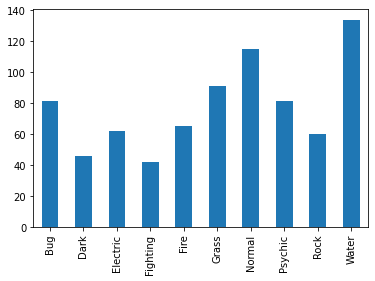

In [648]:
df_bnb['type_1'].value_counts().sort_index().plot.bar()

# ***Bernoulli NB***: Create X and Y for model training

In [649]:
X = df_bnb.drop(columns = 'type_1')
Computer = {}
Computer['feature_names'] = X.columns.values
Computer['data'] = X.values
Y = Y1
Computer['target_names'] = Y['type_1'].unique()
Computer['target'] = Y['type_1'].values

In [650]:
scores = cross_val_score(NB_B, Computer['data'], Computer['target'], cv=10, scoring='accuracy')
print(scores)
#mean and 95% confidence level
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.62820513 0.55128205 0.55128205 0.57692308 0.48717949 0.57692308
 0.38461538 0.44155844 0.57142857 0.41558442]
Accuracy: 0.52 (+/- 0.15)


In [651]:
y_predict= NB_B.fit(Computer['data'],Computer['target']).predict(Computer['data'])

In [652]:
df_bnb['predict']= y_predict
# df_bnb

In [653]:
mask = (df_bnb['type_1'] == 'Dark')
df  = df_bnb[mask]
# df

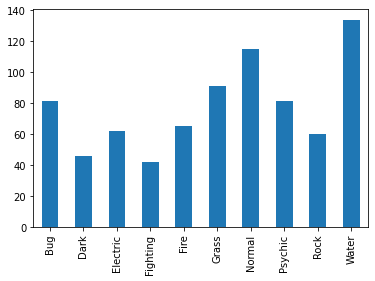

In [654]:
df_bnb['type_1'].value_counts().sort_index().plot.bar()

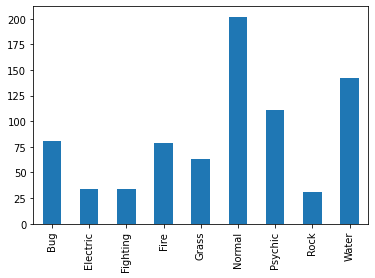

In [655]:
df_bnb['predict'].value_counts().sort_index().plot.bar()

In [673]:
wuga = {}
wuga['target'] = ['YES','NO','NO']
wuga['target']

['YES', 'NO', 'NO']

In [675]:
guess = ['YES','YES','NO']

In [676]:
confusion_matrix(wuga['target'], guess)

array([[1, 1],
       [0, 1]])

In [658]:
Computer['target']

array(['Grass', 'Grass', 'Grass', 'Grass', 'Fire', 'Fire', 'Fire', 'Fire',
       'Fire', 'Water', 'Water', 'Water', 'Water', 'Bug', 'Bug', 'Bug',
       'Bug', 'Bug', 'Bug', 'Bug', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Dark', 'Normal', 'Dark', 'Normal', 'Normal', 'Electric',
       'Electric', 'Electric', 'Electric', 'Fire', 'Fire', 'Normal',
       'Normal', 'Grass', 'Grass', 'Grass', 'Bug', 'Bug', 'Bug', 'Bug',
       'Normal', 'Dark', 'Normal', 'Dark', 'Water', 'Water', 'Fighting',
       'Fighting', 'Fire', 'Fire', 'Water', 'Water', 'Water', 'Psychic',
       'Psychic', 'Psychic', 'Psychic', 'Fighting', 'Fighting',
       'Fighting', 'Grass', 'Grass', 'Grass', 'Water', 'Water', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Fire', 'Psychic', 'Fire',
       'Psychic', 'Water', 'Psychic', 'Water', 'Water', 'Electric',
       'Electric', 'Normal', 'Fighting', 'Normal', 'Normal', 'Water',
       'Water', 'Water', 'Water', 'Rock', 'Psychic', 'Psychic', 'Wat

In [659]:
y_predict

array(['Grass', 'Grass', 'Grass', 'Grass', 'Grass', 'Grass', 'Grass',
       'Grass', 'Grass', 'Water', 'Water', 'Water', 'Water', 'Bug', 'Bug',
       'Bug', 'Bug', 'Bug', 'Bug', 'Bug', 'Normal', 'Normal', 'Normal',
       'Fire', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Water', 'Water', 'Water', 'Water', 'Normal', 'Normal', 'Water',
       'Water', 'Grass', 'Grass', 'Grass', 'Bug', 'Bug', 'Bug', 'Bug',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Water', 'Water', 'Water',
       'Psychic', 'Psychic', 'Psychic', 'Psychic', 'Fighting', 'Fighting',
       'Fighting', 'Grass', 'Grass', 'Grass', 'Water', 'Water', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Normal', 'Normal',
       'Normal', 'Normal', 'Rock', 'Rock', 'Water', 'Water', 'Rock',
       'Electric', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Water', 'Water', 'Rock', 'Fighting', 'Fighting',
     

In [678]:
Computer['target'] = 

array(['Grass', 'Grass', 'Grass', 'Grass', 'Fire', 'Fire', 'Fire', 'Fire',
       'Fire', 'Water', 'Water', 'Water', 'Water', 'Bug', 'Bug', 'Bug',
       'Bug', 'Bug', 'Bug', 'Bug', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Dark', 'Normal', 'Dark', 'Normal', 'Normal', 'Electric',
       'Electric', 'Electric', 'Electric', 'Fire', 'Fire', 'Normal',
       'Normal', 'Grass', 'Grass', 'Grass', 'Bug', 'Bug', 'Bug', 'Bug',
       'Normal', 'Dark', 'Normal', 'Dark', 'Water', 'Water', 'Fighting',
       'Fighting', 'Fire', 'Fire', 'Water', 'Water', 'Water', 'Psychic',
       'Psychic', 'Psychic', 'Psychic', 'Fighting', 'Fighting',
       'Fighting', 'Grass', 'Grass', 'Grass', 'Water', 'Water', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Fire', 'Psychic', 'Fire',
       'Psychic', 'Water', 'Psychic', 'Water', 'Water', 'Electric',
       'Electric', 'Normal', 'Fighting', 'Normal', 'Normal', 'Water',
       'Water', 'Water', 'Water', 'Rock', 'Psychic', 'Psychic', 'Wat

In [ ]:
confusion_matrix(Computer['target'], y_predict)

array([[77,  0,  0,  0,  0,  0,  0,  3,  1,  0],
       [ 0,  0,  0,  4,  8,  0, 20,  6,  0,  8],
       [ 0,  0, 12,  2,  9,  0, 10, 15,  3, 11],
       [ 0,  0,  0, 19,  4,  0,  9,  7,  0,  3],
       [ 2,  0,  3,  1, 27,  5, 17,  8,  0,  2],
       [ 0,  0,  0,  0, 10, 55, 14,  6,  0,  6],
       [ 0,  0,  3,  0,  6,  0, 86,  7,  2, 11],
       [ 0,  0, 11,  8,  2,  0, 15, 41,  1,  3],
       [ 0,  0,  0,  0,  0,  0, 11,  7, 22, 20],
       [ 2,  0,  5,  0, 13,  3, 20, 11,  2, 78]])

# ***Bernoulli NB***: Do the splitting

In [ ]:
X_df = X.copy(deep = True)
y_df = Y.copy(deep = True)

In [656]:
#split the dataset as training and testing two parts
X_train, X_test, y_train, y_test = train_test_split(Computer['data'], 
                                                    Computer['target'], 
                                                    test_size=0.05, 
                                                    random_state=1,
                                                    stratify=Computer['target'])

In [ ]:
NB_B.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
NB_B.class_count_

array([ 77.,  44.,  59.,  40.,  62.,  86., 109.,  77.,  57., 127.])

In [ ]:
y_predict = NB_B.predict(X_test) # that's it, nice and simple.

In [ ]:
test_df = pd.DataFrame(X_test, columns=Computer['feature_names'])
test_df['class']=y_test
test_df['pre']=y_predict
test_df['error']=np.where(test_df['class']!=test_df['pre'],1,0)
test_df['error'].sum()

15

In [ ]:
NB_B.score(X_test, y_test)

0.6153846153846154

# Ensemble

Lets do bagging

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# GaussianNB
# MultinomialNB
# BernoulliNB
# KNeighborsClassifier
# DecisionTreeClassifier

In [ ]:
rangex = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#for j in rangex:
  #for i in rangex:
bagging = BaggingClassifier(base_estimator = BernoulliNB(),
                          n_estimators = 10,
                          max_samples = 0.4, max_features = 0.8, # samp = 0.4, feat = 0.8 best: 0.51
                          random_state = 10)
scores_b = cross_val_score(bagging, Computer['data'], Computer['target'], cv=10, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_b.mean(), scores_b.std() * 2))

Accuracy: 0.52 (+/- 0.17)


In [ ]:
bagging = BaggingClassifier(base_estimator = MultinomialNB(),
                            n_estimators = 100,
                            max_samples = 0.5, max_features = 0.9, # samp = 0.5, feat = 0.9 best: 0.52
                            random_state = 10)
scores_b = cross_val_score(bagging, Computer['data'], Computer['target'], cv=10, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_b.mean(), scores_b.std() * 2))

Accuracy: 0.52 (+/- 0.16)


In [ ]:
for j in rangex:
  for i in rangex:
    bagging = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth=12),
                                n_estimators = 100,
                                max_samples = i, max_features = j, # samp = 0.4, feat = 0.4 best: 0.51
                                random_state = 10)
    scores_b = cross_val_score(bagging, Computer['data'], Computer['target'], cv=10, scoring='accuracy')
    print("feat = ",j, " samp = ", i," Accuracy: %0.2f (+/- %0.2f)" % (scores_b.mean(), scores_b.std() * 2))

feat =  0.1  samp =  0.1  Accuracy: 0.20 (+/- 0.11)
feat =  0.1  samp =  0.2  Accuracy: 0.19 (+/- 0.09)
feat =  0.1  samp =  0.3  Accuracy: 0.20 (+/- 0.09)
feat =  0.1  samp =  0.4  Accuracy: 0.20 (+/- 0.11)
feat =  0.1  samp =  0.5  Accuracy: 0.20 (+/- 0.10)
feat =  0.1  samp =  0.6  Accuracy: 0.21 (+/- 0.12)
feat =  0.1  samp =  0.7  Accuracy: 0.22 (+/- 0.13)
feat =  0.1  samp =  0.8  Accuracy: 0.21 (+/- 0.11)
feat =  0.1  samp =  0.9  Accuracy: 0.21 (+/- 0.11)
feat =  0.2  samp =  0.1  Accuracy: 0.46 (+/- 0.16)
feat =  0.2  samp =  0.2  Accuracy: 0.47 (+/- 0.16)
feat =  0.2  samp =  0.3  Accuracy: 0.47 (+/- 0.16)
feat =  0.2  samp =  0.4  Accuracy: 0.47 (+/- 0.15)
feat =  0.2  samp =  0.5  Accuracy: 0.47 (+/- 0.15)
feat =  0.2  samp =  0.6  Accuracy: 0.47 (+/- 0.16)
feat =  0.2  samp =  0.7  Accuracy: 0.47 (+/- 0.18)
feat =  0.2  samp =  0.8  Accuracy: 0.47 (+/- 0.15)
feat =  0.2  samp =  0.9  Accuracy: 0.47 (+/- 0.17)
feat =  0.3  samp =  0.1  Accuracy: 0.48 (+/- 0.14)
feat =  0.3 

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, criterion='gini',
                             max_features = 'auto',
                             max_depth=12,
                             bootstrap=True,
                             random_state=10)
scores_b = cross_val_score(rfc, Computer['data'], Computer['target'], cv=10, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_b.mean(), scores_b.std() * 2))

Accuracy: 0.49 (+/- 0.16)
